# APS 8

Entrega: 28/11 ao final do atendimento (17:15)

## Questão 1

Assuma que $X$ seja uma variável aleatória contínua que descreve o preço de um multímetro digital em uma loja brasileira qualquer. Ainda, assuma que o preço médio seja igual a $R\$ 45,00$ e o desvio padrão, igual a $R\$ 25,00$.

Em todos os itens a seguir, deixe claro como foi construído o novo preço em função de $X$.

Deixe todas as contas claramente indicadas.

a) Se todas as lojas brasileiras que vendem multímetro resolvessem acrescentar 15 reais no preço de cada um dos seus respectivos multímetros. Nesse caso, qual o novo preço médio do multímetro e respectivo desvio padrão?

b) Se todas as lojas brasileiras que vendem multímetro resolvessem aumentar o preço de cada um dos seus respectivos multímetros em $150\%$. Nesse caso, qual o novo preço médio do multímetro e respectivo desvio padrão?

c) Se você precisa comprar dez multímetros e deseja comprá-los todos iguais e na mesma loja. Nesse caso, qual o gasto total esperado e respectivo desvio padrão?

#### a) O desvio padrão segue o mesmo e a média será de 60 reais
#### b) O preço medio sera de 112,5 e o desvio padrão de 62,5 reais.
#### c) Gasto 450 e dp 250

In [12]:
#a
Ea = 45+15
print (Ea)

#b
Eb = 2.5*45
print (Eb)
Var = 25**2
C = 2.5**2
VarN = Var*C
DV = VarN**0.5
print(DV)

#c
E_N = 45*10
print (E_N)
DV_N = ((10**2)*(25**2))**0.5
print (DV_N)

60
112.5
62.5
450
250.0


## Questão 2

	
	
Assuma que, na disciplina Ciência dos dados, a nota final da disciplina seja função da nota média das provas $X$ e da nota média dos projetos $Y$. Assuma ainda que ambas as notas tem mesmo peso na construção da nota final na disciplina.


Considerando que a nota média dos alunos nas provas segue uma normal com média 4 e desvio padrão igual a 1,5, ou seja $ X \sim N(4 ; 2,25)$ . E que a nota média dos alunos nos projetos segue uma normal com média 7 e desvio padrão igual a 1, ou seja, $Y\sim N(7 ; 1)$.


Na prática, é razoável acreditar que haja uma associação positiva entre essas notas. Aqui, considere que a covariância entre essas notas médias é igual a $0,675$ .

Em todos os itens a seguir, deixe todas as contas claramente indicadas. 


a) Calcule a nota média final e respectivo desvio padrão.
   
 b) Considere que a nota final na disciplina Ciência dos dados segue uma distribuição com média e variância obtidas no item anterior.      Calcule a probabilidade de um aluno ser aprovado na disciplina.


#### a) Nota média 5,5 e dp 1,07.
#### b) 32,05%

In [13]:
from scipy import stats
#a
X = 4
Y = 7
a = 0.5
b = 0.5
cov = 0.675
VarX = 2.25
VarY = 1
E_XY = a*X + b*7
print(E_XY)
Var_XY = (a**2)*VarX + (b**2)*VarY + 2*a*b*cov
DV = (Var_XY)**0.5
print (Var_XY)
print (DV)
P = (1-stats.norm.cdf(5.5, loc=5, scale=DV))*100
print (P)

5.5
1.15
1.0723805294763609
32.0517421499


### Dataset para as questões de programação

Vamos trabalhar com o problema *House Sales in King County*, do Kaggle
[https://www.kaggle.com/harlfoxem/housesalesprediction](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

%matplotlib inline

C:\Insper\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
houses = pd.read_csv("casas.csv")

In [3]:
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,grade
0,540000.0,4,2.50,2600,9935,2.0,0,8
1,815000.0,3,3.75,2780,5002,2.0,0,10
2,279000.0,3,2.25,2070,7800,1.0,900,7
3,360000.0,2,2.50,1233,1244,2.0,270,7
4,309000.0,3,2.50,1990,3614,2.0,0,7


## Q3

O dataset fornecido é uma amostra extraída de um dataset maior. A amostra pode ter vindo de uma população com média de `sqft_lot` de 8250? 

Passos:

**a)** Verifique que `sqft_lot` **não** é normal.

Dica: na *APS 7* foi feito um teste de normalidade. Repita o mesmo processo

**b)**  Se `sqft_lot` fosse normal, que tipo de teste poderíamos ter usado?

**c)** Saberíamos $\mu$ para montar o t? Saberíamos $\sigma$?


**Bootstrap**:

**d)** Monte um intervalo percentil boostrap de $95\%$.

**e)** Informe os valores inferiores e superiores

**f)** Conclua o teste


[]

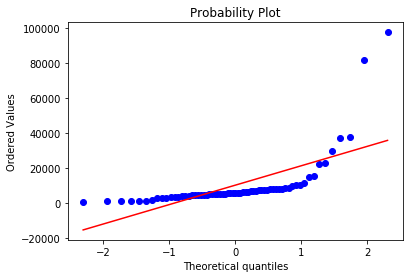

In [8]:
a=houses.sqft_lot
stats.probplot(a, dist='norm', plot=plt)
plt.plot()

#### a) Se fosse uma normal os pontos azuis estariam proximos a linha vermelha.

#### b) Poderiamos ter feito um histograma e verificado que ele segue como uma normal.

#### c) Não, teriamos que estimar esse valor.

Média:  10292.538461538461
Desvio padrão amostral:  16122.868507454057
Limite inferior: 4541.9975
Limite superior: 23054.7775


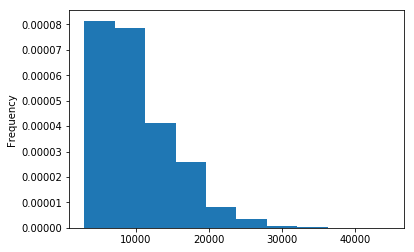

In [11]:
n = len(houses)

xbarra = np.mean(a)
dp = np.std(a, ddof=1)
print("Média: ", xbarra)
print("Desvio padrão amostral: ", dp)

n = 10
xbarra_Boot = []
B = 10000
for i in range(B):
    amostra = np.random.choice(a, size=n, replace=True)
    xbarraB = np.mean(amostra)
    xbarra_Boot.append(xbarraB)
    
Lim_inf = np.percentile(xbarra_Boot, 2.5)
Lim_sup = np.percentile(xbarra_Boot, 97.5)
print('Limite inferior:', Lim_inf)
print('Limite superior:', Lim_sup)

pd.Series(xbarra_Boot).plot.hist(normed=True, legend=False);

## Q4

Faça uma regressão que usa `sqft_living` como variável explicativa  e `price` como resultado: 

**a).** De acordo com a notação que usamos em aula, quem é $\hat{\beta_0}$ e quem é $\hat{\beta_1}$ ?

**b).** Interprete o $R^2$ , os valores $P > |t|$ e também *Prob (F-statistic)*.

**c).** Escreva a equação que expressa `price` em função de `sqft_living`.

**d).** Faça um gráfico de dispersão de `price` em função de `sqft_living`, plote a equação que encontrou no item anterior no mesmo gráfico


In [14]:
import statsmodels.api as sm

Y = houses.price
X = houses.sqft_living
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     56.21
Date:                Tue, 28 Nov 2017   Prob (F-statistic):           2.70e-10
Time:                        16:57:10   Log-Likelihood:                -892.24
No. Observations:                  65   AIC:                             1788.
Df Residuals:                      63   BIC:                             1793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.928e+04   7.44e+04      0.662      0.510   -9.95e+04    1.98e+05
sqft_living   247.0810     32.954      7.498      0.000     181.227     312.935
==============================================================================
Omnibus:                       12.716   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.432
Skew:                           0.973   Prob(JB):                      0.00121
Kurtosis:                       4.081   Cond. No.                     6.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

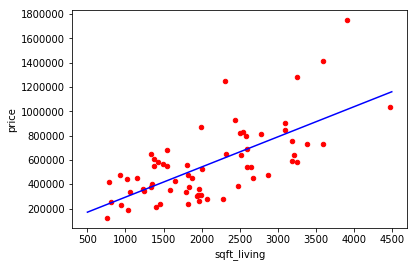

In [15]:
houses.plot.scatter('sqft_living','price', c='r')
plt.plot((500,4500),(170000,1161144),"b-")

## Q5

Faça agora uma regressão múltipla que tenta prever `price` (variável explicada) em função das variáveis `sqft_lot`  e `sqft_basement` (explicativa).

Dica: inclua as duas colunas dentro de uma variável `X`, o restante não se altera em relação à regressão simples.


```python
Y = houses['price']
X = houses.loc[:, ['sqft_lot', 'sqft_basement']]
```

Pede-se:

**a).** Repita a intepretação dos valores $P > |t|$ e Prob (F-statistic) porém com duas variáveis.

O que os valores encontrados implicam para a regressão?


**b).** Escreva a função que foi encontrada pela regressão ( `price` em função de  `sqft_lot`  e `sqft_basement`)

In [16]:
Y = houses.price
X = houses.loc[:, ['sqft_lot', 'sqft_basement']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9115
Date:                Tue, 28 Nov 2017   Prob (F-statistic):              0.407
Time:                        16:57:50   Log-Likelihood:                -912.03
No. Observations:                  65   AIC:                             1830.
Df Residuals:                      62   BIC:                             1837.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.237e+05   5.01e+04     10.462      0.000    4.24e+05    6.24e+05
sqft_lot          2.7668      2.383      1.161      0.250      -1.997       7.531
sqft_basement    68.6891    101.802      0.675      0.502    -134.810     272.188
==============================================================================
Omnibus:                       24.116   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.221
Skew:                           1.369   Prob(JB):                     5.02e-09
Kurtosis:                       5.572   Cond. No.                     2.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""